In [264]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [265]:
#loading dataset
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [266]:
#display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [267]:
#display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [268]:
#preprocessing the dataset
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [269]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

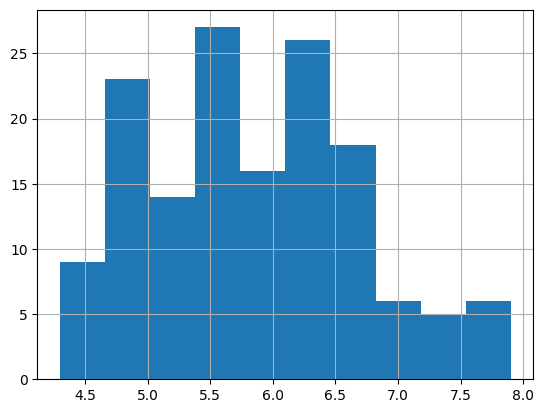

In [270]:
#exploratory data analysis
#histograms
df['sepal_length'].hist()

<Axes: >

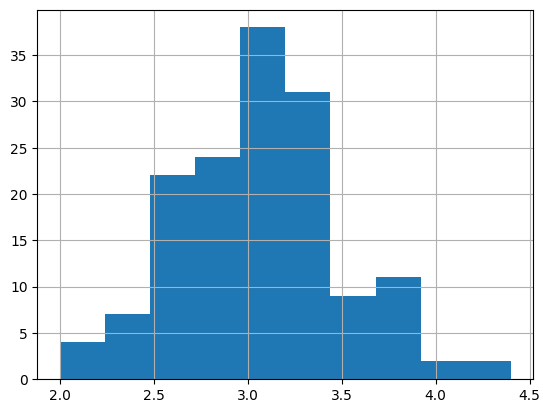

In [271]:
df['sepal_width'].hist()

<Axes: >

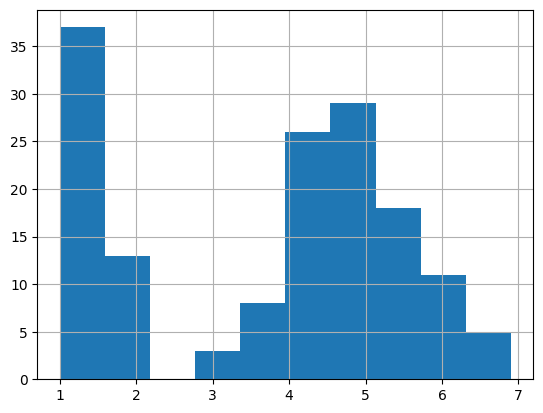

In [272]:
df['petal_length'].hist()

<Axes: >

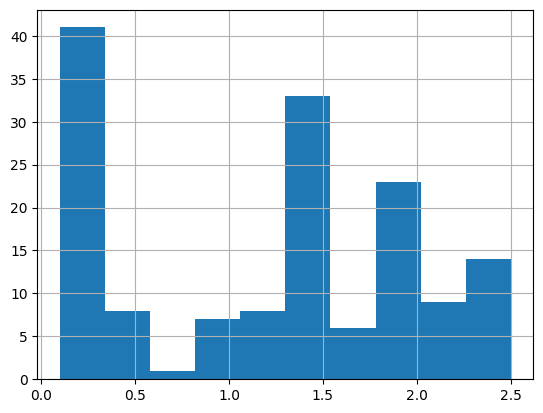

In [273]:
df['petal_width'].hist()

In [274]:
#scatterplot
colors=['purple','gold','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

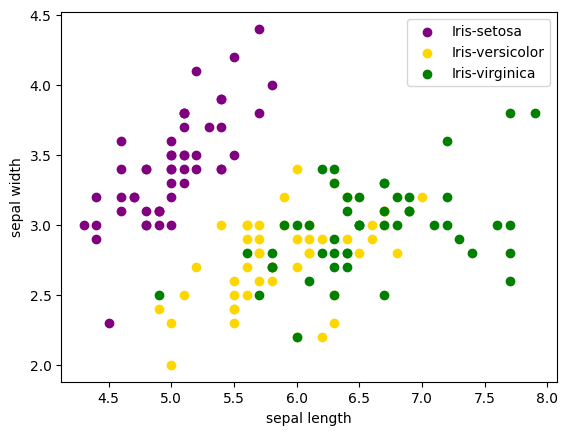

In [275]:
for i in range(3):
    a=df[df['species']==species[i]]
    plt.scatter(a['sepal_length'],a['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()
    

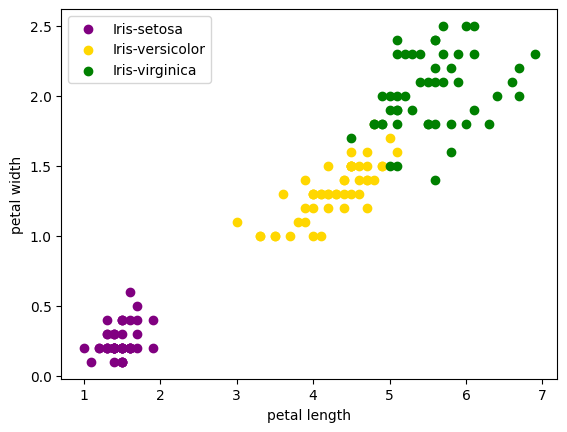

In [276]:
for i in range(3):
    a=df[df['species']==species[i]]
    plt.scatter(a['petal_length'],a['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()

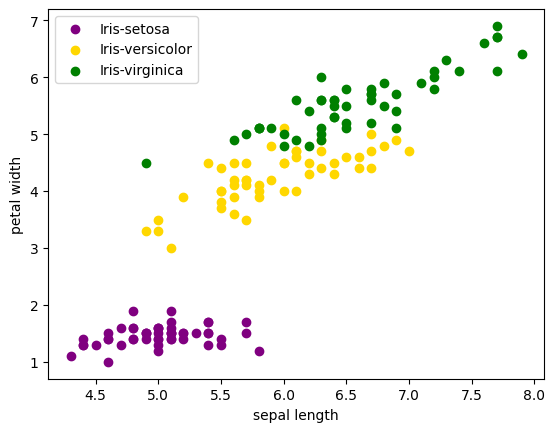

In [277]:
for i in range(3):
    a=df[df['species']==species[i]]
    plt.scatter(a['sepal_length'],a['petal_length'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('petal width')
    plt.legend()

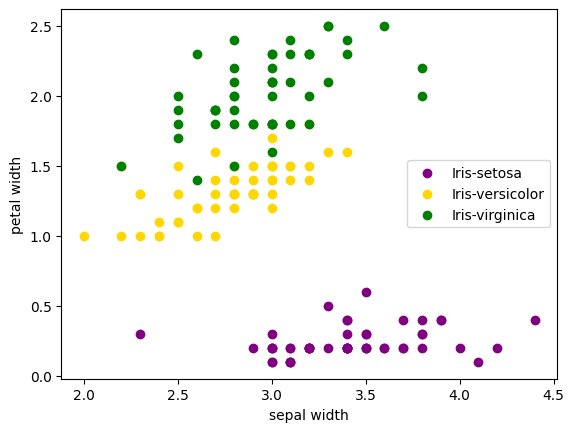

In [278]:
for i in range(3):
    a=df[df['species']==species[i]]
    plt.scatter(a['sepal_width'],a['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal width')
    plt.ylabel('petal width')
    plt.legend()

In [279]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [280]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [281]:
#correlation
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

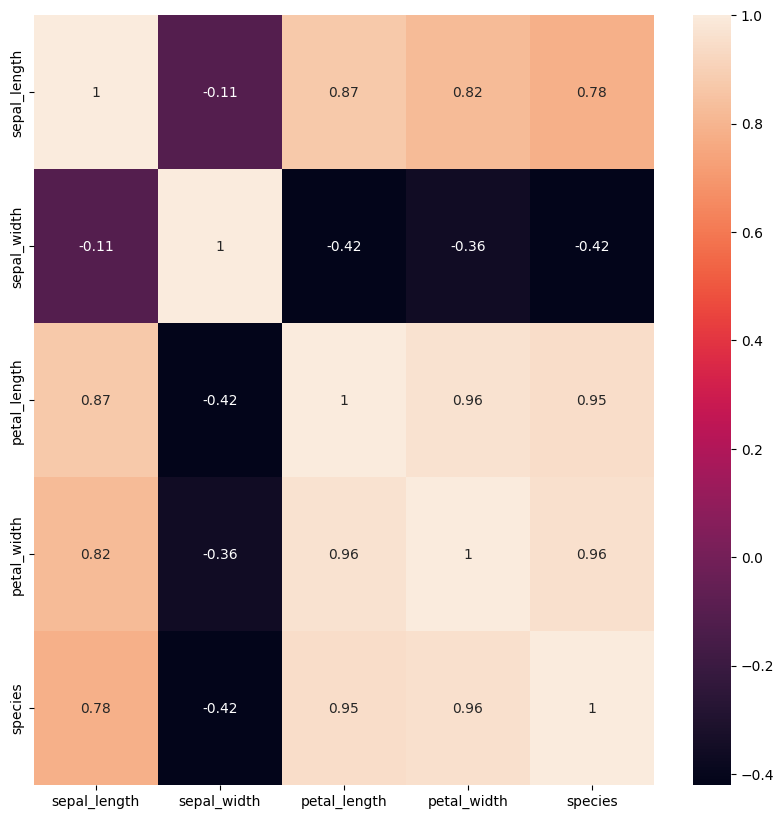

In [282]:
corr=df.corr()
fig, aa=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,aa=aa)

In [283]:
#model training
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)


In [284]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [285]:
model.fit(x_train,y_train)

LogisticRegression()

In [286]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


In [287]:
#knn - k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [288]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [289]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [290]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(
)

In [291]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [292]:
print("Accuracy:",model.score(x_test,y_test)*100)


Accuracy: 93.33333333333333
